In [2]:
from scipy import stats
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problemstellung:

#### Geschlechterverteilung in einem Tech-Unternehmen: 

*Von 150 Angestellten sind nur 30 Frauen, obwohl in der Branche 40% der 
Arbeitskräfte Frauen sind*

In [3]:
P = 0.4 # Empirische Wahrscheinlichkeit der Population
N = 150 # Anzahl der Angestellten (Stichprobenumfang)
TEST_WERT = 30 # Anzahl der Frauen in der Stichprobe
IST_WEIBLICH = [0, 1] # 0 für Männer, 1 für Frauen 
EPOCHS_POPULATION = 1_000_000 # Größe der Population
EPOCHS_STICHPROBEN = 1_00_000 # Anzahl der Simulationen

H₀: Die Einstellung von nur 30 Frauen im Vergleich zum erwarteten Wert von 60 (basierend auf der empirischen Wahrscheinlichkeit von 40 %) ist rein zufällig.

$$ \Rightarrow H_0 = 30$$

H₁: Es ist äußerst unwahrscheinlich, dass nur aufgrund von Zufall 30 Frauen aus 150 Angestellten ausgewählt wurden.

$$ \Rightarrow H_1 > 30$$ 

Wir betrachten eine Population von 1.000.000 Menschen, wobei jede Person entweder als 1 (Frau) oder 0 (nicht Frau) repräsentiert wird. Aus dieser Population ziehen wir 100.000 Stichproben, wobei jede Stichprobe 150 Personen umfasst. Diese Stichproben sind in einem NumPy Array Namens 'stichproben' gespeichert.

In [4]:
population = random.choices(IST_WEIBLICH, weights=[1 - P, P], k=EPOCHS_POPULATION)

stichproben = np.array([np.array(random.sample(population=population, k=N)) \
                        for _ in range(EPOCHS_STICHPROBEN)])
stichproben.shape

(100000, 150)

Nun zählen wir die Anzahl der Frauen in jeder Stichprobe und speichern diese Werte in einem NumPy Array namens 'anzahl_der_frauen'.

In [5]:
anzahl_der_frauen = np.array([np.unique(stichprobe, return_counts=True)[1][1].item() \
                              for stichprobe in stichproben])
anzahl_der_frauen.shape

(100000,)

In [ ]:
mittelwert = np.mean(anzahl_der_frauen)
sigma = np.sqrt(N * P * (1 - P)) # Standardabweichung
erwartungswert = N * P

# Hypothetische Daten generieren für normalverteilte Zufallsvariable
x_werte = np.linspace(0, N, 1000)
y_werte = stats.norm.pdf(x_werte, mittelwert, sigma)
untere_grenze = mittelwert - sigma*2 # 97,5% der Werte auf der rechten Seite der unteren Grenze liegen

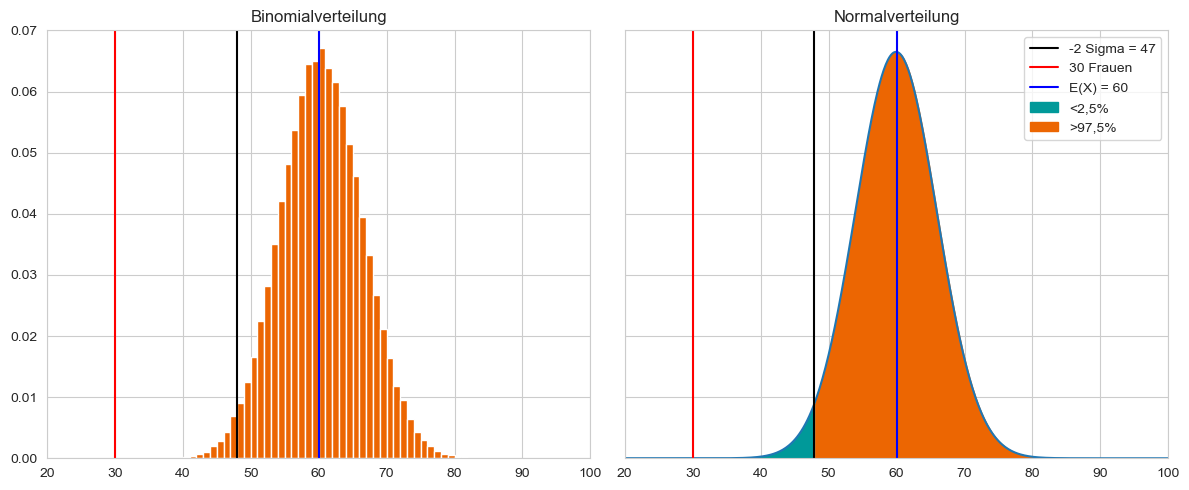

In [7]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))

ax[0].hist(anzahl_der_frauen,
           bins=range(min(anzahl_der_frauen), max(anzahl_der_frauen) + 1),
           density=True,
           color='#EC6602')
ax[0].axvline(x=TEST_WERT, color='r', label=f'{TEST_WERT} Frauen')
ax[0].axvline(x=untere_grenze, color='black', label=f'-2 Sigma = {int(untere_grenze)}')
ax[0].axvline(x=erwartungswert, color='b', label=f'E(X) = {int(erwartungswert)}')
ax[0].set_xlim(20, 100)
ax[0].set_ylim(0, 0.07)
ax[0].set_title('Binomialverteilung')

ax[1].plot(x_werte, y_werte)
ax[1].axvline(x=untere_grenze, color='black', label=f'-2 Sigma = {int(untere_grenze)}')
ax[1].axvline(x=TEST_WERT, color='r', label=f'{TEST_WERT} Frauen')
ax[1].axvline(x=erwartungswert, color='b', label=f'E(X) = {int(erwartungswert)}')
ax[1].fill_between(x_werte, y_werte, 
                   where=x_werte < untere_grenze, color='#009999',
                   label='<2,5%')
ax[1].fill_between(x_werte, y_werte, 
                   where=x_werte > untere_grenze, color='#EC6602', 
                   label='>97,5%')
ax[1].set_title('Normalverteilung')

plt.legend()
plt.tight_layout()
plt.show()

In [8]:
wahr_test_wert = stats.binom.cdf(TEST_WERT, N, P).item()
wahr_untere_grenze = stats.binom.cdf(untere_grenze, N, P).item()
wahr_erwatungswert = stats.binom.cdf(erwartungswert, N, P).item()

print(f"Die Wahrscheinlichkeit, dass X <= {TEST_WERT} ist: {wahr_test_wert * 100:.10f}%")
print(f"Die Wahrscheinlichkeit, dass X <= {int(untere_grenze)} (Untere Grenze) ist: {wahr_untere_grenze * 100:.3f}%")

Die Wahrscheinlichkeit, dass X <= 30 ist: 0.0000139313%
Die Wahrscheinlichkeit, dass X <= 47 (Untere Grenze) ist: 1.757%


Es wird deutlich, dass es sehr unwahrscheinlich ist, in einer Stichprobe von 150 Personen nur 30 Frauen zu haben, wenn der Anteil der Frauen in der Grundgesamtheit 40 % beträgt. Somit verwerfen wir unsere Nullhypothese H0

$$ \Rightarrow H_0 \neq 30$$

Wir stellen fest, dass die Wahrscheinlichkeit, in einer Stichprobe von 150 Personen weniger als 47 Frauen zu haben, nur 2,65 % beträgt. Daher können wir unsere Alternativhypothese H1 annehmen: Die Anzahl der Frauen muss mindestens 48 betragen, um als zufällige Abweichung betrachtet werden zu können.
​

$$ \Rightarrow H_1 \geq 47$$